In [27]:
# Import necessary libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the model function for the system of ODEs
def SXA_I_example_6p4(t, x):
    # Model parameters
    k1 = 0.263          # Reaction constant (m^3*mol^-1*h^-1)
    Qo = 3.78           # Feed flow rate (m^3/h)
    Qe = 0              # Outlet flow rate (m^3/h)
    Cao = 0.054 * 1000  # Initial concentration of A in feed (mol/m^3)
    Cbo = 0             # Initial concentration of B in feed (mol/m^3)
       
    # Rate equation
    R = k1 * (x[0]**2) * x[1]
    
    # Differential equations
    dx = np.zeros(3)
    dx[0] = Qo * (Cao - x[0]) / x[2] - R # Concentration of A (mol/m^3)
    dx[1] = Qo * (Cbo - x[1]) / x[2] - R # Concentration of B (mol/m^3)
    dx[2] = Qo - Qe                      # Volume (m^3)
    
    return dx

# Initial conditions for [A, B, V]
initial_conditions = [0, 0.106, 378]  # Assuming V0 = 1 m^3 initially

# Time span for the integration
t_span = (0, 10)       # Time range from 0 to 10 hours
t_eval = np.linspace(0, 10, 100)  # Time points to evaluate solution

In [28]:
# Solve the system of ODEs with numpy
solution = solve_ivp(SXA_I_example_6p4, t_span, initial_conditions, t_eval=t_eval, method='RK45')

# Extract time and solution arrays
time = solution.t
CA = solution.y[0, :]
CB = solution.y[1, :]
V = solution.y[2, :]

In [41]:
# Solve the system of ODEs with custom made Euler method

def eulerode(dydt, tspan, y0, h, *args):
    """
    eulerode: Euler ODE solver
    Uses Euler's method to integrate an ODE.

    Inputs:
        dydt: Function that evaluates the RHS of the system of ODEs (e.g., dydt(t, y)).
        tspan: List or tuple [ti, tf] where ti and tf are the initial and final values of the independent variable.
        y0: Initial value(s) of the dependent variable(s).
        h: Step size.
        *args: Additional parameters for the dydt function.

    Output:
        t: Array of values for the independent variable.
        y: Array of values for the dependent variable solution.
    """

    # Ensure proper input length
    if len(tspan) < 2:
        raise ValueError("tspan should contain initial and final time [ti, tf]")

    ti, tf = tspan

    # Check if final time is greater than initial time
    if tf <= ti:
        raise ValueError("Upper limit must be greater than lower limit in tspan")

    # Create a time vector from ti to tf with step size h
    tt = np.arange(ti, tf + h, h)
    n = len(tt)

    # Preallocate y array for efficiency, ensure it matches shape of y0
    yy = np.zeros((n, len(y0)))
    yy[0, :] = y0

    # Implement Euler's method
    for i in range(n - 1):
        yy[i + 1, :] = yy[i, :] + np.array(dydt(tt[i], yy[i, :], *args)) * (tt[i + 1] - tt[i])

    return tt, yy


# Call the Euler ODE solver
h = 0.1
tt, yy = eulerode(SXA_I_example_6p4, t_span, initial_conditions, h)

# Extract time and solution arrays
time_Eul = tt
CA_Eul = yy[:, 0]
CB_Eul = yy[:, 1]
V_Eul = yy[:, 2]

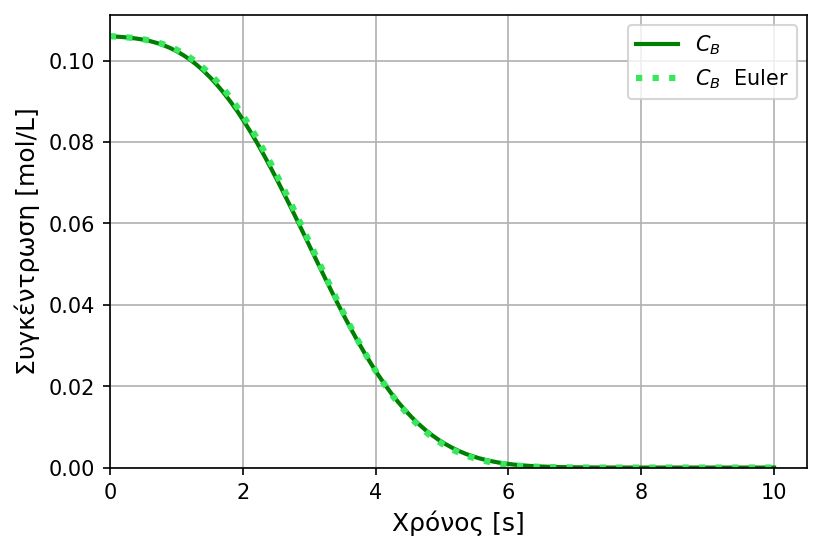

In [42]:
# Plot the results
plt.figure(dpi=150)  # Set high DPI for a large, high-resolution plot
#plt.plot(time, CA, label='$C_A$', linestyle='-', color='blue', linewidth=2)
#plt.plot(time, CA_Eul, label='$C_A$ Euler', linestyle=':', color='cyan', linewidth=3)
plt.plot(time, CB, label='$C_B$', linestyle='-', color='green', linewidth=2)
plt.plot(time_Eul, CB_Eul, label='$C_B$  Euler', linestyle=':', color='#39e75f', linewidth=3)

# Set the plot to start at the origin
plt.xlim(left=0)  # Start x-axis at 0
plt.ylim(bottom=0)  # Start y-axis at 0

# Customize plot with labels, title, and legend
plt.xlabel('Χρόνος [s]', fontsize=12)
plt.ylabel('Συγκέντρωση [mol/L]', fontsize=12)
#plt.title('Number of Mol per Species', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()